# 0.0 Imports

In [13]:
from sklearn      import datasets             as dt
from sklearn      import model_selection      as ms
from sklearn      import tree                 as tr
from sklearn      import metrics              as mt
from sklearn      import linear_model         as lm

from matplotlib   import pyplot               as plt

import seaborn as sns
import pandas as pd
import numpy as np

# 1.0 Load Dataset

In [2]:
# cria um conjunto de dados com 500 amostras e duas classes. Por padrão o número de features é igual a 20 e
# o parâmetro 'n_redundant=2' indica que 2 dessas features são redundantes, ou seja, são altamente correlacionadas
X, y = dt.make_classification(n_samples=500, n_classes=2, n_redundant=0, random_state=0)

In [3]:
X

array([[-0.56660302, -1.92023149, -2.01828187, ..., -0.17845681,
         1.60286363, -1.00326576],
       [-0.43496189,  0.7562101 ,  0.08656649, ..., -1.19417351,
        -0.7193372 ,  0.3137913 ],
       [ 1.69596953, -1.05995968, -0.89832197, ..., -1.84653198,
        -0.25631689,  0.14180664],
       ...,
       [ 0.17124355, -2.00411469,  2.04207215, ..., -0.57891814,
         1.45871475,  0.03890871],
       [-0.11422555, -0.68997525,  0.19718106, ..., -1.02256439,
         0.47603138,  0.01323977],
       [-1.73417864, -0.19136993,  0.52488285, ..., -0.8613356 ,
        -0.17965198,  0.04056849]])

In [4]:
X.shape

(500, 20)

In [5]:
# Variavel que contém os labels das classes
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

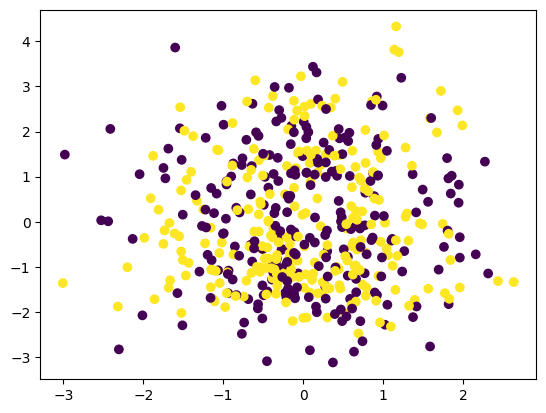

In [6]:
plt.scatter(X[:,0], X[:, 1], c=y)

## Visualização dos dados

Para visualizarmos melhor os dados, vamos plota-los usando a função `sns.pairplot()` que agrupa as colunas de um dataframe duas a duas e faz um scatterplot deles. Mas para isso precisamos criar um dataframe com os dados de `X` e `y`.

In [27]:
# a função 'np.atleast_2d()' converte uma array unidimensional em duas dimensões fazendo a tranformação de shape
# da seguinte maneira: (n,) -> (1,n). Após a mudança de dimensão nós fazemos a transposição para transformar o
# array 'y' em um vetor coluna((1,n) -> (n,1)) de modo que ele possa se concatenado com os dados em 'X'.
np.atleast_2d(y).T[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [31]:
# outra forma de fazermos o mesmo processo é utilizando o método abaixo.
y[np.newaxis].T[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [42]:
# cria o dataframe
df = pd.DataFrame(pd.DataFrame(np.concatenate([X, np.atleast_2d(y).T], axis=1)))
df.columns = [i for i in range(0, 20)] + ['target']

df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.566603,-1.920231,-2.018282,0.174630,0.159192,1.037445,1.697346,-0.083288,-0.872158,-2.105761,...,1.176787,-0.913122,0.465589,-0.505341,0.982327,-0.292594,-0.178457,1.602864,-1.003266,0.0
1,-0.434962,0.756210,0.086566,-1.327164,1.017787,-2.079486,-0.492150,-0.722304,-1.141708,-0.850076,...,0.795877,0.399969,-1.960869,-2.059080,0.910620,-0.340183,-1.194174,-0.719337,0.313791,0.0
2,1.695970,-1.059960,-0.898322,1.833435,0.466380,-0.477286,2.488442,0.599369,-0.400986,-0.626685,...,-0.971171,0.802052,0.460794,-0.983118,0.355704,1.426317,-1.846532,-0.256317,0.141807,0.0
3,1.104578,-0.416816,-1.998639,-0.602332,0.923797,0.460814,0.730352,2.526368,0.377910,-0.581239,...,1.324359,-1.146000,-0.168214,-0.289005,0.921408,-0.172201,0.047066,1.769921,-1.014826,0.0
4,1.762343,-0.556512,1.217697,-0.018432,-1.187092,0.255167,0.473071,-0.516172,0.069559,-1.835794,...,-0.486040,-1.087466,0.266105,-0.313643,-1.050405,0.524489,-0.051539,-0.742764,0.899112,0.0


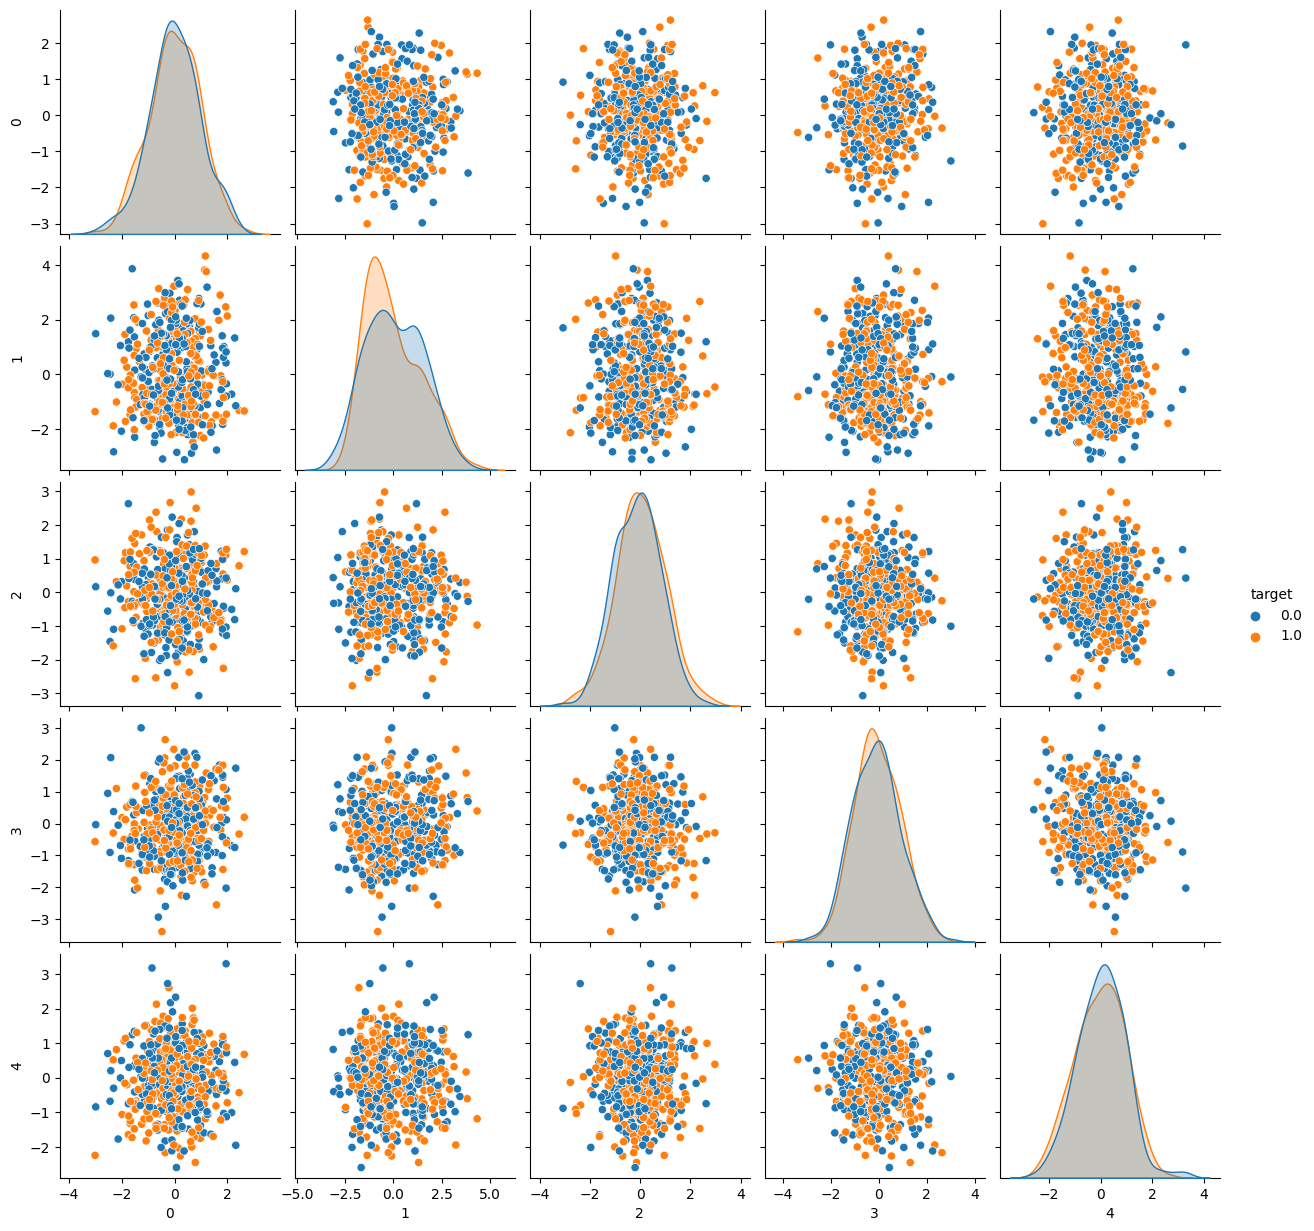

In [43]:
# faz o plot comparando os valores das 5 primeiras features.
sns.pairplot(data=df[[0, 1, 2, 3, 4, 'target']], hue='target')

# 2.0 Model Training

In [44]:
# Divide o conjunto de dados em treino e teste, separando 20% dos dados para treino
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [45]:
# define
#model = tr.DecisionTreeClassifier(max_depth=2)
model = lm.LogisticRegression(solver='lbfgs')

#fit
model.fit(X_train, y_train)


# performance
# y_hat_test = model.predict(X_test)
y_hat_test = model.predict_proba(X_test)  # A função '.predict_proba()' retorna a probabilidade de uma observação
                                          # pertencer a uma das classes

In [46]:
y_hat_test[:10]

array([[0.90003176, 0.09996824],
       [0.88493824, 0.11506176],
       [0.93929261, 0.06070739],
       [0.88671767, 0.11328233],
       [0.20882509, 0.79117491],
       [0.99273303, 0.00726697],
       [0.89480588, 0.10519412],
       [0.73424008, 0.26575992],
       [0.05841355, 0.94158645],
       [0.00825935, 0.99174065]])

Vamos selecionar a segunda coluna de `y_hat_test`(que contém as probabilidade dos pontos pertencerem a segunda classe) e em seguinte calcular a precision e recall dessa classe.

In [47]:
y_hat_test = y_hat_test[:, 1]

In [48]:
# Essa variavel agora está guardando a porcentagem, calculada pelo algoritmo de que uma observação pertença
# a classe 1. Nesse caso a primeira observação tem 9.99% de pertencer a classe 1 e assim por diante.
y_hat_test[:10]

array([0.09996824, 0.11506176, 0.06070739, 0.11328233, 0.79117491,
       0.00726697, 0.10519412, 0.26575992, 0.94158645, 0.99174065])

Vamos agora ver como se comportam as métricas de avaliação do modelo (precision e recall) quando nós variamos o requisito/porcentagem mínimo (threshold) para que uma observação seja classificada como pertencente a classe 1.

A **precisão** é a porcentagem de elementos que de fato eram positivos entre os que o modelo classificou como positivo:

$precision = \frac{\#TP}{\#TP + \#FP}$

O **Recall** é porcentagem de elementos classificados como positivo entre os que de fato eram positivo.

$recall = \frac{\#TP}{\#TP + \#FN}$

In [49]:
# a função 'precision_recall_curve()' calcula a precision e o recall para diferentes valores de threshold
precision, recall, thresholds = mt.precision_recall_curve(y_test, y_hat_test)

In [50]:
y_hat_test

array([0.09996824, 0.11506176, 0.06070739, 0.11328233, 0.79117491,
       0.00726697, 0.10519412, 0.26575992, 0.94158645, 0.99174065,
       0.16922173, 0.99699654, 0.03581765, 0.8194737 , 0.0404982 ,
       0.92631826, 0.98476979, 0.3271976 , 0.97744482, 0.1378355 ,
       0.97899652, 0.97038942, 0.19111567, 0.89042134, 0.83887623,
       0.41135332, 0.24425355, 0.07436241, 0.13895106, 0.87885121,
       0.43707044, 0.49498246, 0.06316093, 0.99102397, 0.79410118,
       0.99209209, 0.03790133, 0.04206056, 0.97588897, 0.44410141,
       0.64952509, 0.89908346, 0.10064234, 0.1277156 , 0.95187269,
       0.9802049 , 0.7821893 , 0.05006913, 0.09865405, 0.99966011,
       0.97219706, 0.06065672, 0.97473967, 0.12687744, 0.41554745,
       0.76606417, 0.62088229, 0.13072556, 0.72633797, 0.60611721,
       0.35671619, 0.44922976, 0.25805993, 0.99735354, 0.58471684,
       0.4724709 , 0.15601387, 0.87647833, 0.76666523, 0.02957079,
       0.98659226, 0.05171698, 0.93384395, 0.0092796 , 0.00707

A função `precision_recall_curve()` retorna 3 arrays:

* precision
* recall
* thresholds

A array threshold é contém as probabilidades obtidas anteriormente em ordem crescente.

In [51]:
y_hat_copy = y_hat_test.copy()
y_hat_copy.sort()

y_hat_copy

array([0.00707214, 0.00726697, 0.00857211, 0.00870645, 0.0092796 ,
       0.02829187, 0.02957079, 0.03581765, 0.03790133, 0.0396219 ,
       0.0404982 , 0.04206056, 0.05006913, 0.05171698, 0.05501503,
       0.06065672, 0.06070739, 0.06316093, 0.07436241, 0.08070491,
       0.09865405, 0.09996824, 0.10064234, 0.10226455, 0.10519412,
       0.11328233, 0.11506176, 0.12687744, 0.1277156 , 0.13072556,
       0.13652209, 0.1378355 , 0.13895106, 0.14459966, 0.15601387,
       0.16922173, 0.19111567, 0.24202307, 0.24425355, 0.25805993,
       0.26575992, 0.30995866, 0.32122569, 0.32592322, 0.3271976 ,
       0.35671619, 0.39886737, 0.40857872, 0.41135332, 0.41554745,
       0.43707044, 0.44410141, 0.44922976, 0.45271169, 0.4724709 ,
       0.49498246, 0.58471684, 0.60611721, 0.62088229, 0.64952509,
       0.67465202, 0.72633797, 0.76606417, 0.76666523, 0.7821893 ,
       0.79117491, 0.79410118, 0.80358726, 0.8194737 , 0.83887623,
       0.86023102, 0.87634047, 0.87647833, 0.87885121, 0.89042

In [52]:
thresholds

array([0.00707214, 0.00726697, 0.00857211, 0.00870645, 0.0092796 ,
       0.02829187, 0.02957079, 0.03581765, 0.03790133, 0.0396219 ,
       0.0404982 , 0.04206056, 0.05006913, 0.05171698, 0.05501503,
       0.06065672, 0.06070739, 0.06316093, 0.07436241, 0.08070491,
       0.09865405, 0.09996824, 0.10064234, 0.10226455, 0.10519412,
       0.11328233, 0.11506176, 0.12687744, 0.1277156 , 0.13072556,
       0.13652209, 0.1378355 , 0.13895106, 0.14459966, 0.15601387,
       0.16922173, 0.19111567, 0.24202307, 0.24425355, 0.25805993,
       0.26575992, 0.30995866, 0.32122569, 0.32592322, 0.3271976 ,
       0.35671619, 0.39886737, 0.40857872, 0.41135332, 0.41554745,
       0.43707044, 0.44410141, 0.44922976, 0.45271169, 0.4724709 ,
       0.49498246, 0.58471684, 0.60611721, 0.62088229, 0.64952509,
       0.67465202, 0.72633797, 0.76606417, 0.76666523, 0.7821893 ,
       0.79117491, 0.79410118, 0.80358726, 0.8194737 , 0.83887623,
       0.86023102, 0.87634047, 0.87647833, 0.87885121, 0.89042

In [53]:
# confirmamos que os inputs de ambas as array são os mesmos
y_hat_copy == thresholds

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Para calcular os valores de `precision` e `recall`, o algoritmo compara a probabilidades obtidas em `y_hat_test` e compara com o threshold, se a probabilidade calculada for maior que o threshold, a observação é classificada com label da classe 1 e 0 caso o contrário, esse processo é feito para todas as probabilidades em `y_hat_test` e então calculamos a `precision` e o `recall` para esse valor do threshold.

O processo é repetido para todos os valores do threshold.

In [54]:
precision

array([0.49      , 0.49494949, 0.48979592, 0.49484536, 0.5       ,
       0.50526316, 0.5106383 , 0.51612903, 0.52173913, 0.52747253,
       0.53333333, 0.53932584, 0.54545455, 0.55172414, 0.55813953,
       0.56470588, 0.57142857, 0.57831325, 0.58536585, 0.59259259,
       0.5875    , 0.59493671, 0.6025641 , 0.61038961, 0.61842105,
       0.61333333, 0.62162162, 0.61643836, 0.625     , 0.61971831,
       0.62857143, 0.62318841, 0.63235294, 0.62686567, 0.62121212,
       0.63076923, 0.640625  , 0.65079365, 0.66129032, 0.67213115,
       0.66666667, 0.6779661 , 0.68965517, 0.68421053, 0.69642857,
       0.69090909, 0.7037037 , 0.71698113, 0.73076923, 0.74509804,
       0.74      , 0.75510204, 0.77083333, 0.78723404, 0.80434783,
       0.8       , 0.79545455, 0.79069767, 0.78571429, 0.7804878 ,
       0.8       , 0.82051282, 0.81578947, 0.81081081, 0.80555556,
       0.8       , 0.82352941, 0.84848485, 0.875     , 0.87096774,
       0.86666667, 0.86206897, 0.89285714, 0.92592593, 0.92307

In [55]:
recall

array([1.        , 1.        , 0.97959184, 0.97959184, 0.97959184,
       0.97959184, 0.97959184, 0.97959184, 0.97959184, 0.97959184,
       0.97959184, 0.97959184, 0.97959184, 0.97959184, 0.97959184,
       0.97959184, 0.97959184, 0.97959184, 0.97959184, 0.97959184,
       0.95918367, 0.95918367, 0.95918367, 0.95918367, 0.95918367,
       0.93877551, 0.93877551, 0.91836735, 0.91836735, 0.89795918,
       0.89795918, 0.87755102, 0.87755102, 0.85714286, 0.83673469,
       0.83673469, 0.83673469, 0.83673469, 0.83673469, 0.83673469,
       0.81632653, 0.81632653, 0.81632653, 0.79591837, 0.79591837,
       0.7755102 , 0.7755102 , 0.7755102 , 0.7755102 , 0.7755102 ,
       0.75510204, 0.75510204, 0.75510204, 0.75510204, 0.75510204,
       0.73469388, 0.71428571, 0.69387755, 0.67346939, 0.65306122,
       0.65306122, 0.65306122, 0.63265306, 0.6122449 , 0.59183673,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.55102041,
       0.53061224, 0.51020408, 0.51020408, 0.51020408, 0.48979

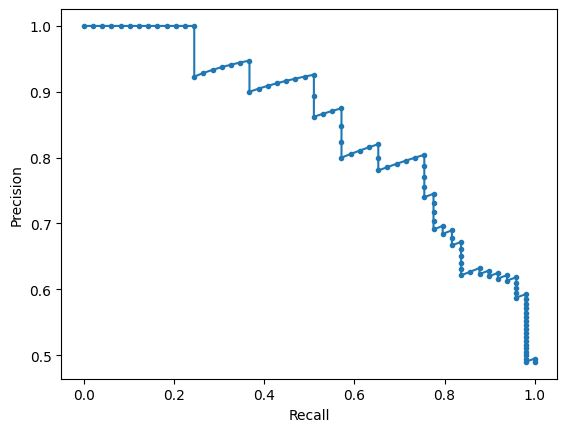

In [56]:
plt.plot(recall, precision, marker='.', label='Model')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

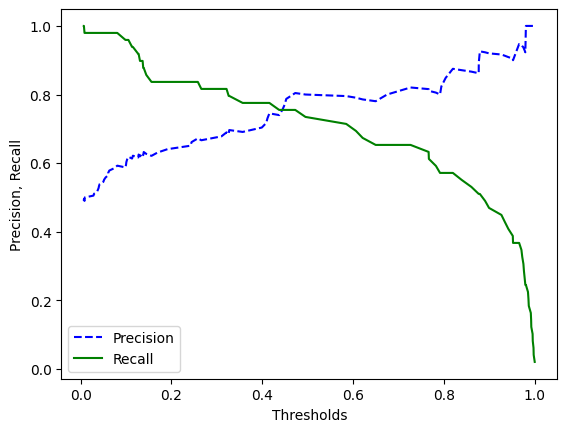

In [60]:
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')

plt.xlabel('Thresholds')
plt.ylabel('Precision, Recall')
plt.legend()

plt.show()

In [58]:
thresholds[:5]

array([0.00707214, 0.00726697, 0.00857211, 0.00870645, 0.0092796 ])

Quando temos um baixo valor de threshold, a probabilidade mínima exigida para se classificar uma observação com a classe 1 é pequena e portanto o nosso modelo classificará muitos pontos com essa classe.

Quando isso acontece, aumenta-se o número de elementos erroneamente classificados com $1$ (classe positiva), ou seja, o número de falsos positivos é grande. Nessa situação o denominador da fórmula de precisão se torna um número grande e portanto a precisão do modelo diminui.

$\downarrow precision = \frac{\#TP}{\#TP +\; \uparrow \#FP}$


O contrário ocorre com o recall, pois como o modelo classifica muitos pontos com classe positiva, poucos pontos são classificados com a classe negativa e portanto teremos um número baixo de elementos classificados erroneamente com classe negativa (**false negative** - situação em que um ponto que era de fato positivo foi classificado como negativo).

$\uparrow recall = \frac{\#TP}{\#TP + \; \downarrow \#FN}$